In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('iris_2class.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


Após o carregamento dos dados é utilizado o comando de descrição para verificar o desvio padrão de todas as caracteristicas

In [4]:
pd.set_option("display.max_columns", None)
df.groupby('especie').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
especie                                                                    
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)                                                \
                      count   mean       std  min    25%  50%    75%  max   
especie                                                                     
versicolor             50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
virginica              50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

           petal length (cm)                                               \
                       count   mean       std  min  25%   50%    75%  max   
especie                                                                     
versicolor              50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
virginica               50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
especie                                                                
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

Com apenas a leitura da tabela é dificil visualizar como os dados estão distribuídos dentro de uma característica, por isso utilizaremos o histograma que permite melhor visualização:

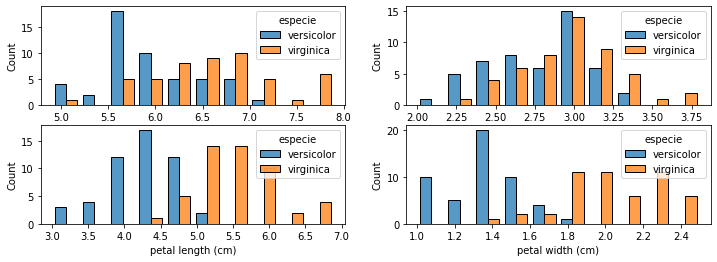

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,4))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0,0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0,1])
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[1,0])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[1,1])
plt.show()

Agora que descobrimos que os valores mais espaçados são altura da pétala e largura da pétala podemos utilizá-lo no scatterplot para visualizar melhor os dados

<function matplotlib.pyplot.show(close=None, block=None)>

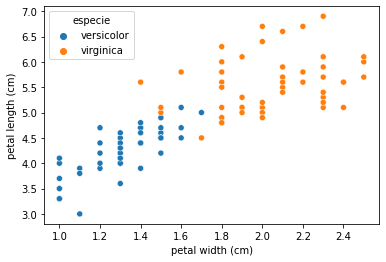

In [6]:
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='especie')
plt.show

Agora que visualizamos, é possível perceber que um bom limiar para a separação dos dados se encontra na largura da pétula: 1.7

<function matplotlib.pyplot.show(close=None, block=None)>

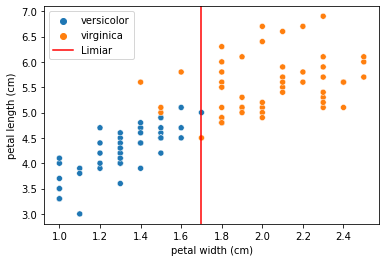

In [7]:
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='especie')
plt.axvline(1.7, color='red', label='Limiar')
plt.legend()
plt.show

# Classificador Limiar

In [8]:
def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
    resposta = []   
    for idx, dado in dados.iterrows():
        if dado[0] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['especie'])


In [9]:
df[['petal length (cm)', 'petal width (cm)']]

,petal length (cm),petal width (cm)
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5
...,...,...
95,5.2,2.3
96,5.0,1.9
97,5.2,2.0
98,5.4,2.3


In [10]:
predicoes = classificador_limiar(1.6, df[['petal width (cm)']])
for p in predicoes.values.flatten():
    print(p, end=", ")

versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, virginica, versicolor, virginica, virginica, virginica, versicolor, versicolor, virginica, vi

In [11]:
predicoes = classificador_limiar(1.6, df[['petal width (cm)']])
for i in np.vstack([df['especie'].values, predicoes['especie'].values]).T:
    print(i)

['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'virginica']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'virginica']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versicolor']
['versicolor' 'versico

Através do classificador limiar e do gabarito pudemos perceber os erros e acertos com o limiar escolhido por nós, mas para escolhermos o melhor limiar é necessário fazer uma busca exaustiva passando por todos os limiares

# Busca exaustiva

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Algoritmo da busca exaustiva

In [15]:
def busca_exaustiva(limiar, data):
    classificacao = []
    for idx,d in data.iterrows():
        if d[0] < limiar:
            classificacao.append('versicolor')
        else:
            classificacao.append('virginica')
    
    return pd.DataFrame(classificacao, columns=['especie'])

Melhor limiar: 1.608, Melhor Acurácia: 0.940


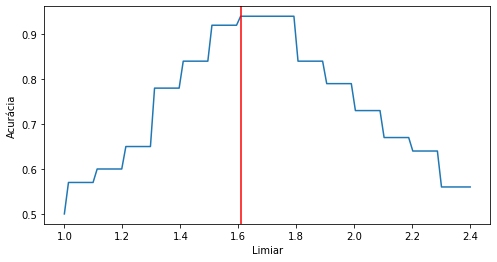

In [16]:
n_limiares = 100
limiares = np.linspace(1.0, 2.4, n_limiares)
acuracias = []

melhor_limiar = limiares[0]
melhor_acuracia = 0

dados = df[['petal width (cm)']]

for limiar in limiares:
    predicoes = busca_exaustiva(limiar, dados)
    
    acuracia = accuracy_score(df['especie'], predicoes['especie'])
    acuracias.append(acuracia)
    
    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar

print("Melhor limiar: %.3f, Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))

fig, axes = plt.subplots(figsize=(8,4))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()



Na imagem acima podemos observar as acurácias (eixo Y) de acordo com os limiares (eixo X), e que o melhor limiar neste caso é 1.608, porem, este limiar pode variar de acordo com os dados utilizados para treino e teste, por isso é criado diferentes conjuntos de treino e teste onde cada dado fará parte de um conjunto de forma aleatória. 

# Conjuntos de Treino e Teste

O conjunto de treino em teste serve para separação dos dados em dois conjuntos, de treino que normalmente passa 80% dos dados para treino de um limiar (entre outras coisas), e um conjunto de teste que testará o melhor limiar do treino.
Vale lembrar que a criação de vários conjuntos de treino e teste com o embaralhamento dos dados permitirá verificar com mais precisão a taxa de acerto dos testes, já que diferentes dados passarão pelo treino, e diferentes dados serão testados.

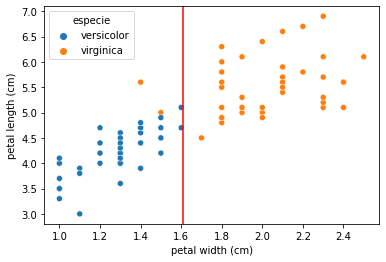

In [26]:
import random

seeds = [random.randint(10, 1000) for i in range(20)]
acuracias_teste = []
classificacoes = []
melhor_acuracia_teste = 0

for seed in seeds:
    X_teste, X_treino, y_teste, y_treino = train_test_split(df[['petal width (cm)']], df['especie'], test_size=0.2, stratify=df['especie'].tolist(),shuffle=True, random_state=(seed*1000))
    classificacao_teste = busca_exaustiva(melhor_limiar, X_teste)
    classificacoes.append(classificacao_teste)
    acuracia_teste = accuracy_score(y_teste, classificacao_teste)
    acuracias_teste.append(acuracia_teste)

np_acuracias_teste = np.append(acuracias_teste, [])

X_teste, X_treino, y_teste, y_treino = train_test_split(df[['petal width (cm)', 'petal length (cm)']], df['especie'], test_size=0.2, stratify=df['especie'].tolist(), shuffle=True, random_state= seeds[np_acuracias_teste.argmax()]*1000)

dt = X_teste
dt['especie'] = y_teste

sns.scatterplot(data= dt, x= 'petal width (cm)', y= 'petal length (cm)', hue= 'especie')
plt.axvline(melhor_limiar, color='red', label="Limiar")


In [29]:
print("Maior acurácia: %.2f, Menor acurácia: %.2f, Acurácia média: %.2f+-%.2f, Melhor Limiar: %.2f" % (np_acuracias_teste.max(), np_acuracias_teste.min(),np.mean(acuracias_teste), np_acuracias_teste.std(), melhor_limiar))

Maior acurácia: 0.97, Menor acurácia: 0.93, Acurácia média: 0.94+-0.01, Melhor Limiar: 1.61


Com os dados da busca exaustiva de todos os conjuntos, é possível observar que o melhor limiar entre todos os conjuntos é próximo do limiar escolhido anteriormente (seção do classificador Limiar) com uma diferença de 0.002, porém, há dados que isso pode não ocorrer, mostrando a importância dos conjuntos de treino e teste com busca exaustiva.